# Levenshtein Score EDA
This notebook explores the results of google places api calls against previously vetted addresses. It uses the levenshtein score (calculated elsewhere, saved as column 'score') to compare accuracy and find inflection points in the data.

This information will be used to refine search terms and improve the initial places search.

In [12]:
import googlemaps
import matplotlib.pyplot as plt
import pandas as pd


from heatmaps.find_addresses import find_addresses
from IPython.core.display import HTML

In [13]:
#df = pd.read_excel('./data/toronto_heatmap.xlsx')
df = pd.read_csv('../data/address_out.csv')
df = df.head()

In [14]:
#df.columns

In [15]:
df = pd.read_csv('../data/comp_out.csv')
df = df[['score','name', 'Address Google','address', 'Source']]
#df.describe()

In [16]:
#CUTOFF = 70
#df2 = df.loc[df['score']<CUTOFF]
#display(HTML(df2.describe().to_html()))
#qual_per = (len(df.index)-len(df2.index))/len(df.index)
#print(f"\nPercentage good quality: {qual_per:.2f}\nBased on a cutt off score of {CUTOFF}")
#df2.head(10)

<AxesSubplot:>

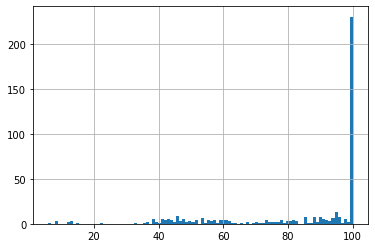

In [18]:
df['score'].hist(bins=100)

<AxesSubplot:>

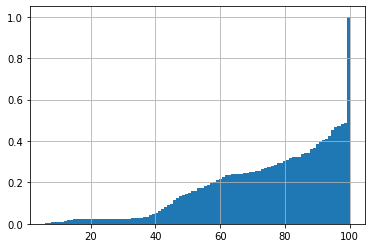

In [8]:
df['score'].hist(cumulative=True, density=1, bins=100)

<AxesSubplot:ylabel='Density'>

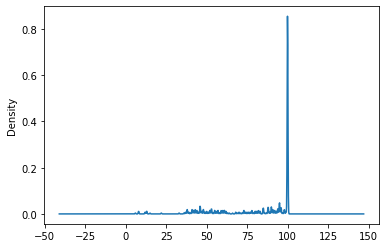

In [23]:
df['score'].plot.kde(bw_method=.01)

In [21]:
CUTOFF_TOP = 80
CUTOFF_BOT = 65
df2 = df.loc[
    (df['score']<=CUTOFF_TOP)
    & (df['score']>=CUTOFF_BOT)
 #   & (df['Source']=='mturk')
]
print(f"Number of Rows: {len(df2)}\n")
df2.tail(10)

Number of Rows: 28



,score,name,Address Google,address,Source
331,73,Janssen-Cilag Polska Sp. z o.o.,"19 Green Belt Dr., , Toronto, Ontario, M3C 1L9","19 Green Belt Dr, North York, ON M3C 1L9, Canada",mturk
332,73,Technion - Israel Institute of Technology,"970 Lawrence Avenue West, Suite 206, , Toronto...","970 Lawrence Ave W Suite 206, North York, ON M...",mturk
333,72,CATIE,"555 Richmond Street West, Suite 505, Box 1104,...","555 Richmond St W #505, Toronto, ON M5V 3B1, C...",mturk
334,71,Canadian Cancer Society,"Canadian Cancer Society, National Office, 55 S...","55 St Clair Ave W Suite 500, Toronto, ON M4V 2...",mturk
335,70,Geneseeq Technology Inc.,"101 College St, Toronto, ON M5G 1L7, Canada","South Tower, Suite 200, MaRS Centre, 101 Colle...",Google Maps API
336,70,Lambda Therapeutic Research INC,"460 Comstock Road, , Toronto, Ontario, M1L 4S4","460 Comstock Rd, Scarborough, ON M1L 4S4, Canada",mturk
337,69,Eurofins,"1111 Flint Rd., Unit 36, Downsview, Ontario, C...","1111 Flint Rd, North York, ON M3J 3C7, Canada",mturk
338,68,The Hospital for Sick Children,"Sick Kids (The Hospital for Sick Children), 55...","555 University Ave, Toronto, ON M5G 1X8, Canada",Google Maps API
339,68,George Brown College,"160 Kendal Ave, Toronto, ON M5R 1M3, Canada","200 King St E, Toronto, ON M5A 3W8, Canada",Google Maps API
340,66,St. Michael's Hospital,"30 Bond St, Toronto, ON M5B 1W8, Canada","410 Sherbourne St, Toronto, ON M4X 1K2, Canada",Google Maps API
